# `cloudwatcher` Python API usage

The purpose of this page is to provide a quick overview of the `cloudwatcher` Python API. The package consists of two user-facing classes:

- `MetricWatcher`: This class is used to interact with AWS CloudWatch metrics.
- `LogWatcher`: This class is used to interact with AWS CloudWatch logs.

Both of these classes inherit from the `CloudWatcher` class.

## `MetricWatcher`: convenient interface to AWS CloudWatch metrics

`MetricWatcher` can be used to interact with AWS CloudWatch metrics. 

### `MetricWatcher` initialization

As described in the Login credentials section, the AWS credentials can be sourced from environment variables: `AWS_ACCESS_KEY_ID`, `AWS_SECRET_ACCESS_KEY`, `AWS_SESSION_TOKEN`.
Alternatively, you can pass the values as arguments to the `MetricWatcher` constructor.

In [1]:
from cloudwatcher import MetricWatcher
from cloudwatcher.const import QUERY_KWARGS_PRESETS

instance_id = "i-0a424d0a6694039ec"
mw = MetricWatcher(
    namespace="michal-NepheleNamespace",
    metric_name="mem_used",
    metric_id="mem_used",
    metric_unit="Bytes",
    dimension_value=instance_id,
    dimension_name="InstanceId",
)

### `MetricWatcher` EC2 query period selection

In order to specify the EC2 instace query settings (period, granularity, etc.), the user would need to provide multiple parameters. To make it easier, there are a few sensible presets that can be used to select the query settings, which are passed to `query_ec2_metrics` method. These presets are defined to query the data reported by `CloudWatchAgent` within the last day, hour or minute.

In [2]:
list(QUERY_KWARGS_PRESETS.keys())

['day', 'hour', 'minute']

The presets can be used by passing the `query_preset` argument to the functions presented below. Alternatively, users can pass `query_kwargs` argument, which overrides the preset values.

### Logging methods

There is a method that can be used to log the metric to the screen. The EC2 instance is automatically queried if the query response is not provided.

In [3]:
mw.log_metric(query_preset="day")

┏━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Time (UTC) ┃ Value       ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│  20:06:00  │ 762.426 MB  │
│  20:05:50  │ 762.641 MB  │
│  20:05:40  │ 762.480 MB  │
│  20:05:30  │ 762.254 MB  │
│  20:05:20  │ 762.715 MB  │
│  20:05:10  │ 762.723 MB  │
│  20:05:00  │ 762.324 MB  │
│  20:04:50  │ 763.070 MB  │
│  20:04:40  │ 763.223 MB  │
│  20:04:30  │ 763.422 MB  │
│  20:04:20  │ 761.316 MB  │
│  20:04:10  │ 762.250 MB  │
│  20:04:00  │ 2.107 GB    │
│  20:03:50  │ 2.333 GB    │
│  20:03:40  │ 2.331 GB    │
│  20:03:30  │ 2.088 GB    │
│  20:03:20  │ 7.882 GB    │
│  20:03:10  │ 7.881 GB    │
│  20:03:00  │ 2.226 GB    │
│  20:02:50  │ 2.130 GB    │
│  20:02:40  │ 2.002 GB    │
│  20:02:30  │ 1.984 GB    │
│  20:02:20  │ 1.888 GB    │
│  20:02:10  │ 1.780 GB    │
│  20:02:00  │ 1.836 GB    │
│  20:01:50  │ 1.726 GB    │
│  20:01:40  │ 2.015 GB    │
│  20:01:30  │ 2.011 GB    │
│  20:01:20  │ 1.464 GB    │
│  20:01:10  │ 1.628 GB    │
│  20:01:00  │ 1.635 GB    │
│  20:00:50  │ 1.554 GB    │
│  20:00:40  │ 1.322 GB    │
│  20:00:30  │ 1.098 GB    │
│  20:00:20  │ 1023.930 MB │
│  20:00:10  │ 865.840 MB  │
│  20:00:00  │ 759.039 MB  │
│  19:59:50  │ 727.934 MB  │
│  19:59:40  │ 704.547 MB  │
│  19:59:30  │ 658.090 MB  │
└────────────┴─────────────┘

### File saving methods

There are number of methods that can be used to save the metric data to a file. Again, the EC2 instance is automatically queried if the query response is not provided.


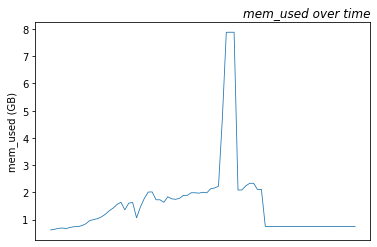

In [4]:
mw.save_metric_plot(file_path=f"/tmp/{instance_id}_plot.png")
mw.save_metric_csv(file_path=f"/tmp/{instance_id}_metric.csv")
mw.save_metric_json(file_path=f"/tmp/{instance_id}_metric.json")
mw.save_response_json(file_path=f"/tmp/{instance_id}_response.json")

### Maunal EC2 querying

For users that require more control over the EC2 instance query settings, the `query_ec2_metrics` method can be used to manually query the EC2 instance. For instance it allows to fine tune the query period settings.

In [5]:
FINE_TUNED_SETTINGS = {
    "days": 1,
    "hours": 0,
    "minutes": 0,
    "stat": "Maximum",
    "period": 60,
}
response = mw.query_ec2_metrics(**FINE_TUNED_SETTINGS)

response["ResponseMetadata"]

{'RequestId': '3e2aba48-c524-40fb-86af-309506615244',
 'HTTPStatusCode': 200,
 'HTTPHeaders': {'x-amzn-requestid': '3e2aba48-c524-40fb-86af-309506615244',
  'content-type': 'text/xml',
  'content-length': '1241',
  'date': 'Thu, 28 Apr 2022 20:09:22 GMT'},
 'RetryAttempts': 0}

### `TimedMetric` dataclass

Internally, the package uses `TimedMetric` dataclass to store the metric data. This dataclass is used to store the metric data and provide a convenient interface to access the data. It can be also used to interact with the metric data by the user.

In [6]:
response = mw.query_ec2_metrics(**FINE_TUNED_SETTINGS)
timed_metric = mw.timed_metric_factory(response)[0]
print(timed_metric.__class__)
timed_metric.values[1:10]

<class 'cloudwatcher.metric_handlers.TimedMetric'>


[799772672.0,
 2262454272.0,
 8463368192.0,
 2286895104.0,
 2163302400.0,
 1668444160.0,
 763293696.0]

## `LogWatcher`: convenient interface to AWS CloudWatch logs

`LogWatcher` can be used to interact with AWS CloudWatch logs.

_Coming soon..._